In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('predictive_maintenance.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df = df.drop(['UDI','Product ID'],axis=1)

In [5]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [7]:
df = df.drop("Failure Type",axis = 1)

In [8]:
# rename dataset columns
df.rename(columns = {'Air temperature [K]':'air',
                     'Process temperature [K]':'process',
                     'Rotational speed [rpm]':'rotationspeed',
                     'Torque [Nm]':'torque',
                     'Tool wear [min]':'toolware'},
          inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           10000 non-null  object 
 1   air            10000 non-null  float64
 2   process        10000 non-null  float64
 3   rotationspeed  10000 non-null  int64  
 4   torque         10000 non-null  float64
 5   toolware       10000 non-null  int64  
 6   Target         10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [10]:
nan_count = df.isna().sum()
print(nan_count)

Type             0
air              0
process          0
rotationspeed    0
torque           0
toolware         0
Target           0
dtype: int64


In [11]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [12]:
df.describe()

,Type,air,process,rotationspeed,torque,toolware,Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


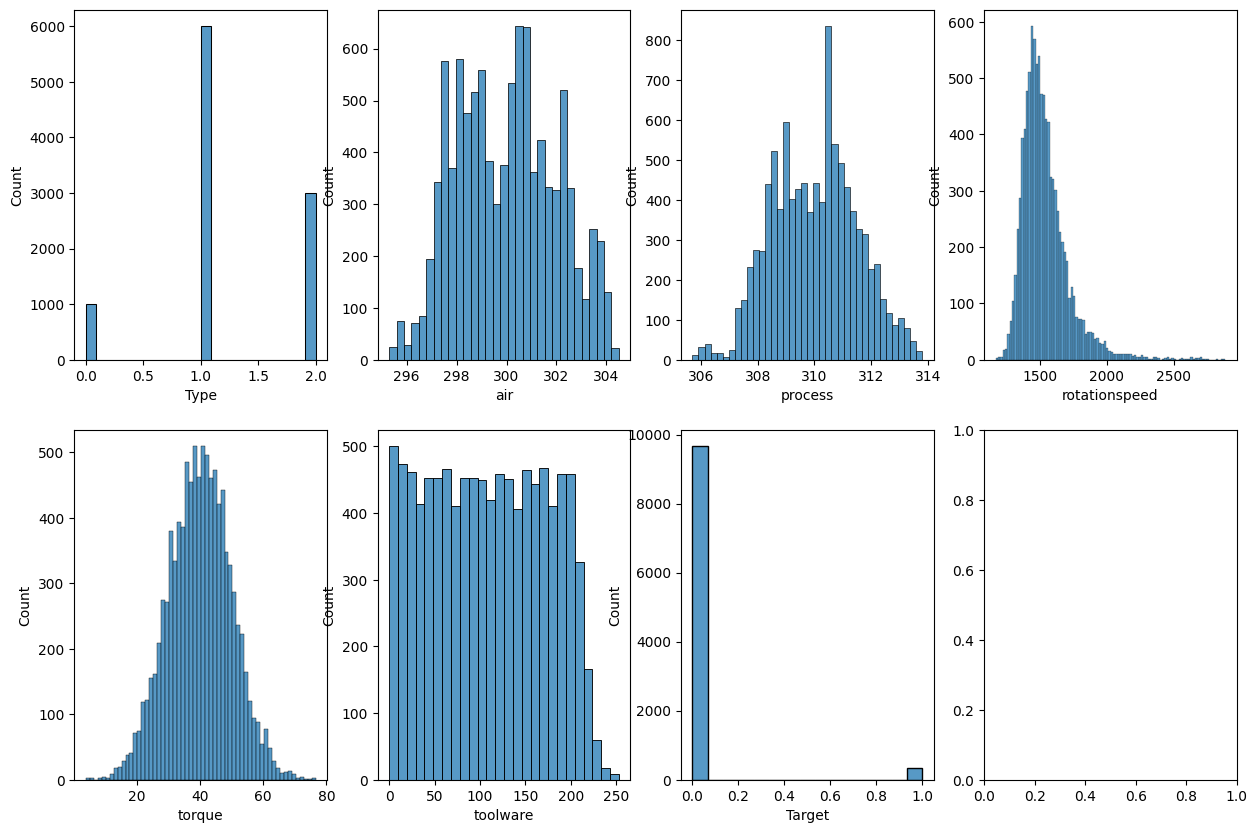

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

In [14]:
# Số lượng mẫu trùng lặp
num_duplicates = df.duplicated().sum()
print(f"Số lượng mẫu trùng lặp: {num_duplicates}")

Số lượng mẫu trùng lặp: 0


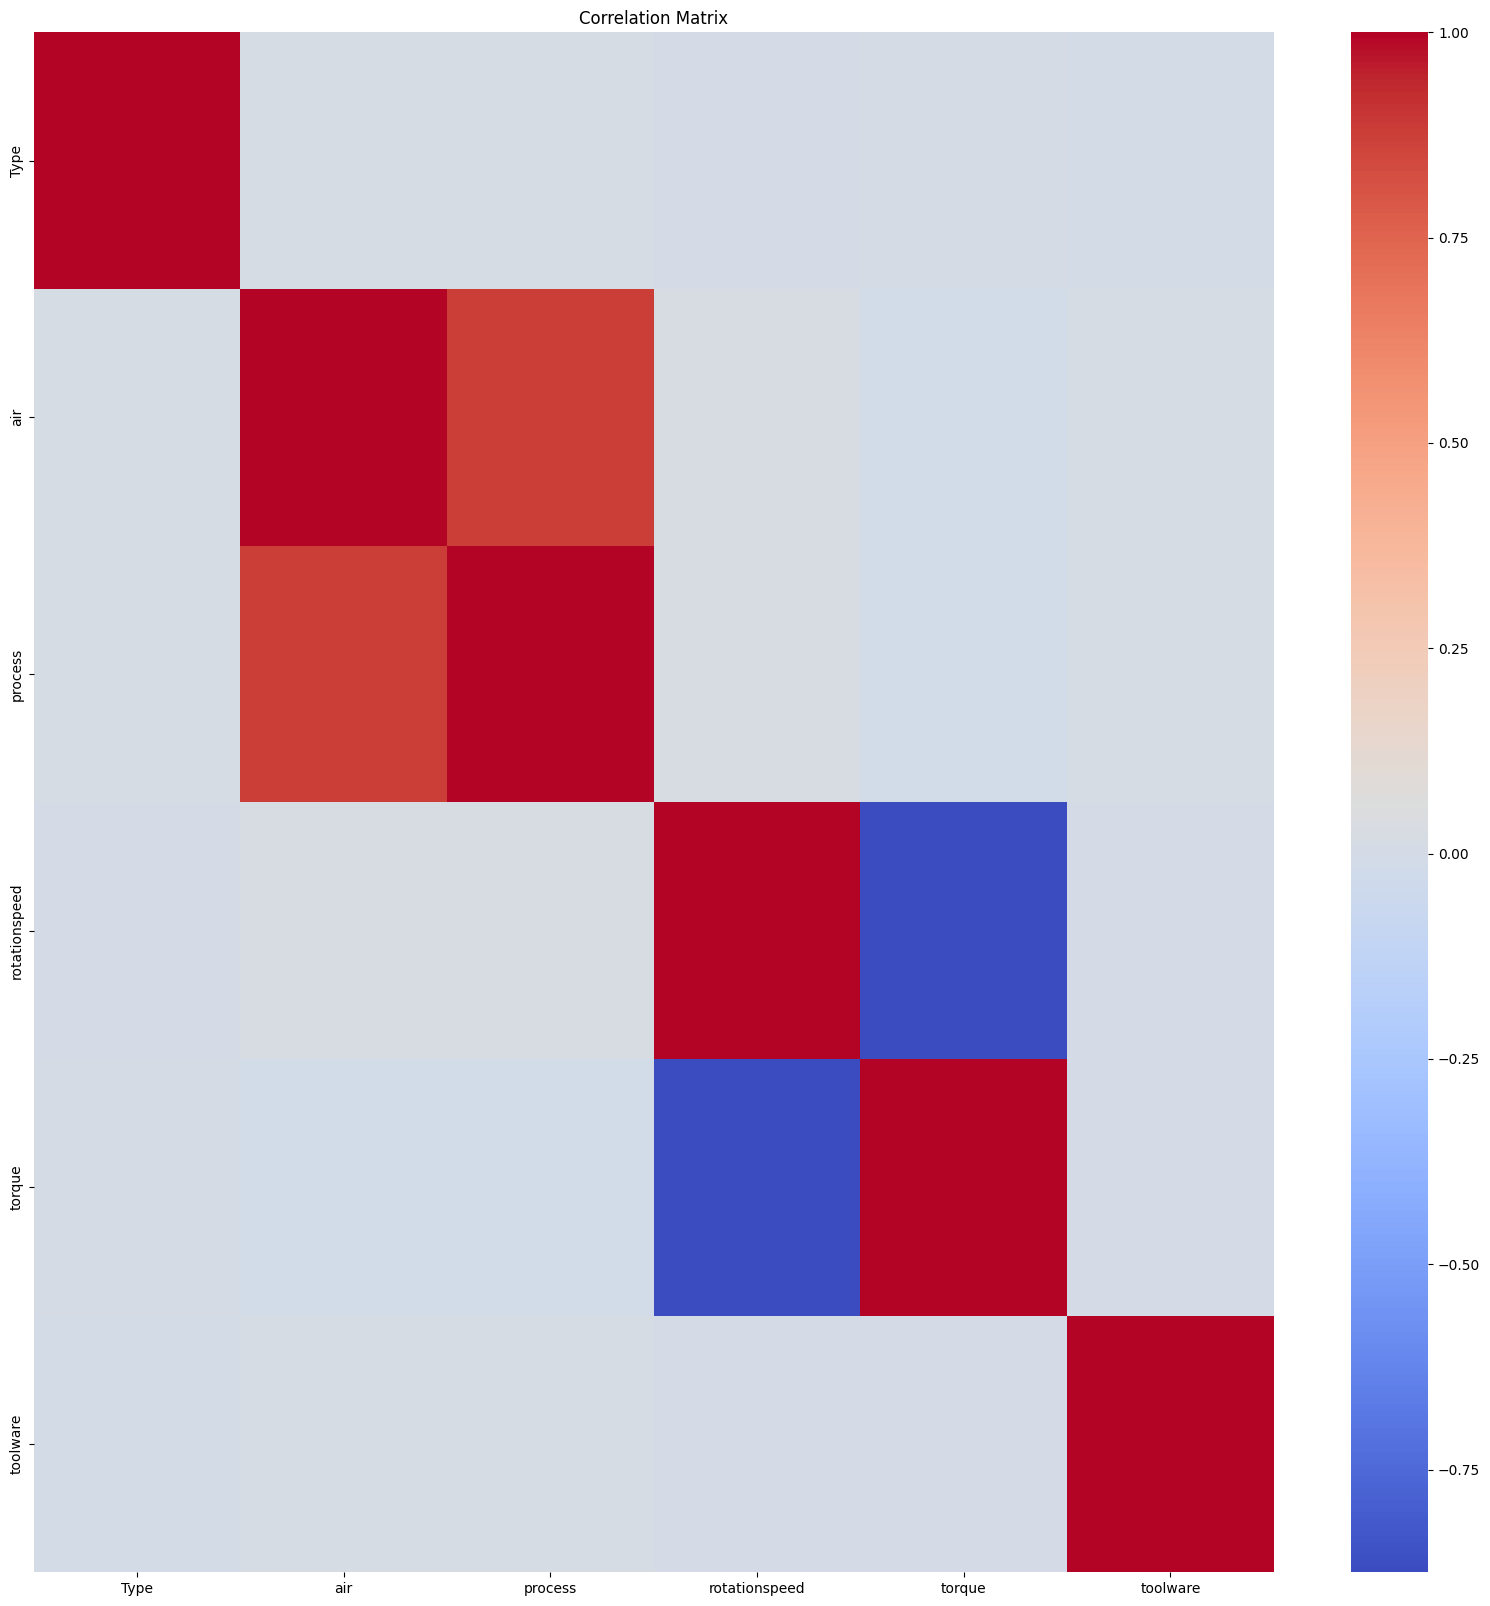

In [15]:
numeric_df = df.drop('Target', axis=1)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
X = df.drop('Target',axis=1)
y = df['Target']

In [17]:
from imblearn.over_sampling import SMOTE
# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X_resampled_ori, y_resampled_ori = smote.fit_resample(X, y)

# Kiểm tra lại sự cân bằng của dữ liệu
print("Số lượng mẫu trước khi áp dụng SMOTE:", dict(pd.Series(y).value_counts()))
print("Số lượng mẫu sau khi áp dụng SMOTE:", dict(pd.Series(y_resampled_ori).value_counts()))

Số lượng mẫu trước khi áp dụng SMOTE: {0: 9661, 1: 339}
Số lượng mẫu sau khi áp dụng SMOTE: {0: 9661, 1: 9661}


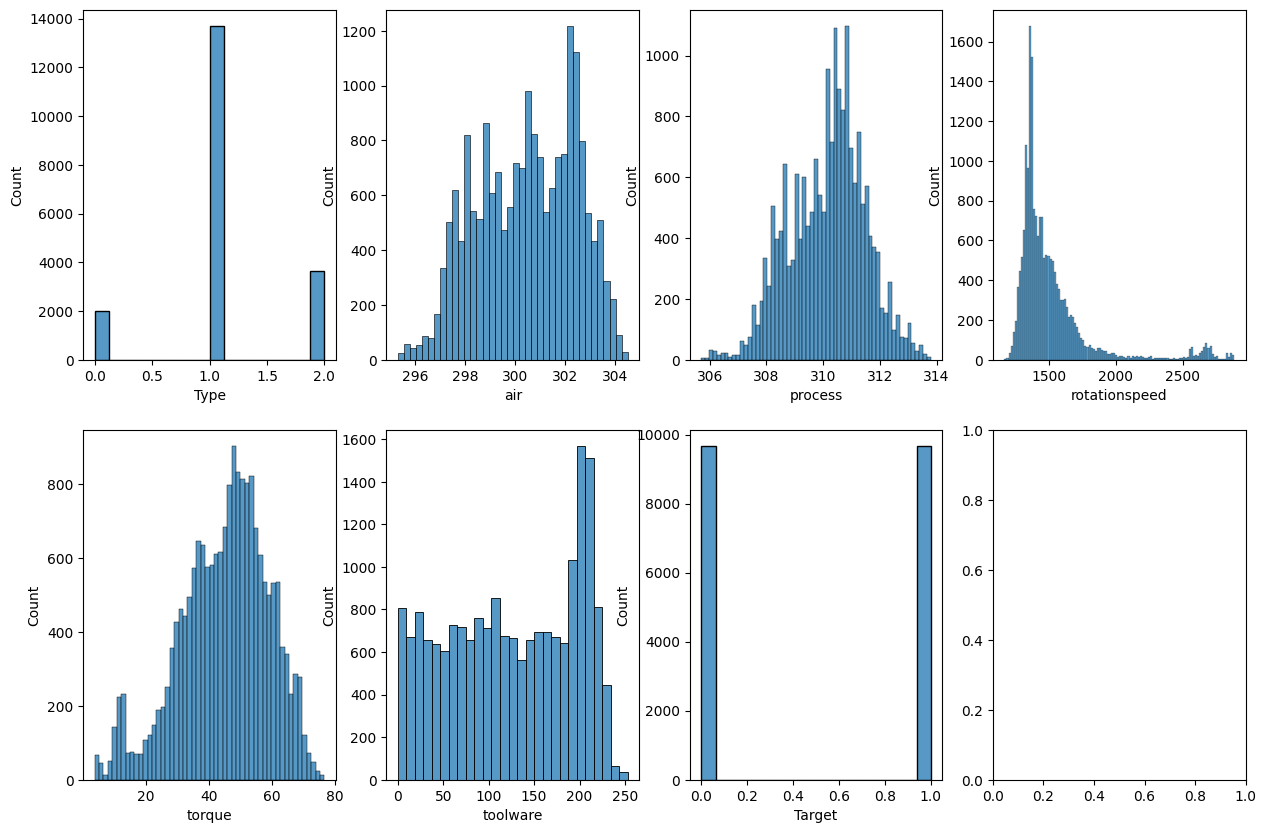

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
df_smote_ori = pd.concat([X_resampled_ori,y_resampled_ori],axis=1)
for i, col in enumerate(df_smote_ori.columns):
    sns.histplot(df_smote_ori[col], ax=ax[i//4][i%4])

In [19]:
from imblearn.over_sampling import BorderlineSMOTE
# Áp dụng Borderline-SMOTE lên tập huấn luyện
borderline_smote = BorderlineSMOTE(random_state=42)
X_resampled_bd, y_resampled_bd = borderline_smote.fit_resample(X, y)

# Kiểm tra lại sự cân bằng của dữ liệu
print("Số lượng mẫu trước khi áp dụng SMOTE:", dict(pd.Series(y).value_counts()))
print("Số lượng mẫu sau khi áp dụng SMOTE:", dict(pd.Series(y_resampled_bd).value_counts()))

Số lượng mẫu trước khi áp dụng SMOTE: {0: 9661, 1: 339}
Số lượng mẫu sau khi áp dụng SMOTE: {0: 9661, 1: 9661}


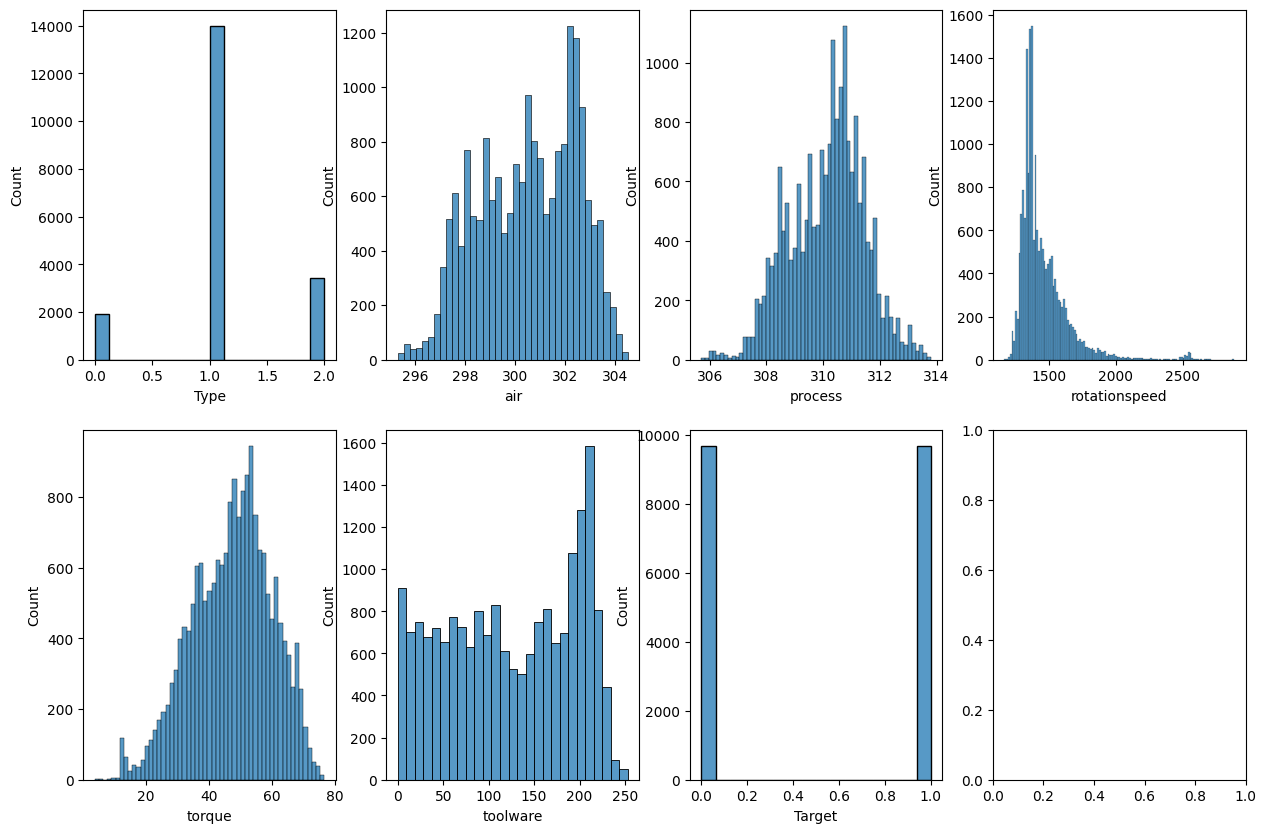

In [20]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
df_smote_bd = pd.concat([X_resampled_bd,y_resampled_bd],axis=1)
for i, col in enumerate(df_smote_bd.columns):
    sns.histplot(df_smote_bd[col], ax=ax[i//4][i%4])

In [21]:
df_smote_bd.describe()

,Type,air,process,rotationspeed,torque,toolware,Target
count,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000
mean,1.077269,300.506612,310.144926,1459.461702,47.359485,123.501604,0.500000
std,0.520559,1.954157,1.311208,190.782812,12.601483,70.635927,0.500013
min,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,1.000000,298.900000,309.200000,1343.000000,38.300000,62.000000,0.000000
50%,1.000000,300.665483,310.300000,1399.000000,48.400000,125.000000,0.500000
75%,1.000000,302.209448,311.017790,1523.000000,56.275914,191.000000,1.000000
max,2.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [22]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
colum = df_smote_bd.columns.drop('Type','Target')
df_smote_bd[colum]=scaler.fit_transform(df_smote_bd[colum])

In [23]:
df_smote_bd.describe()

,Type,air,process,rotationspeed,torque,toolware,Target
count,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000
mean,1.077269,0.565936,0.548756,0.169652,0.598345,0.488149,0.500000
std,0.520559,0.212408,0.161878,0.111049,0.173097,0.279193,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.391304,0.432099,0.101863,0.473901,0.245059,0.000000
50%,1.000000,0.583205,0.567901,0.134459,0.612637,0.494071,0.500000
75%,1.000000,0.751027,0.656517,0.206636,0.720823,0.754941,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
X = df_smote_bd.drop('Target',axis=1)
y = df_smote_bd['Target']

In [25]:
from sklearn.model_selection import train_test_split
#  Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo mô hình KNN với số lượng láng giềng k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

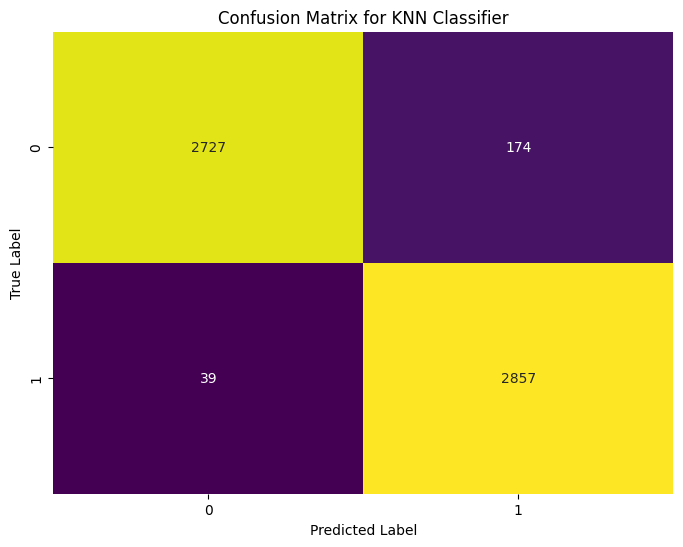

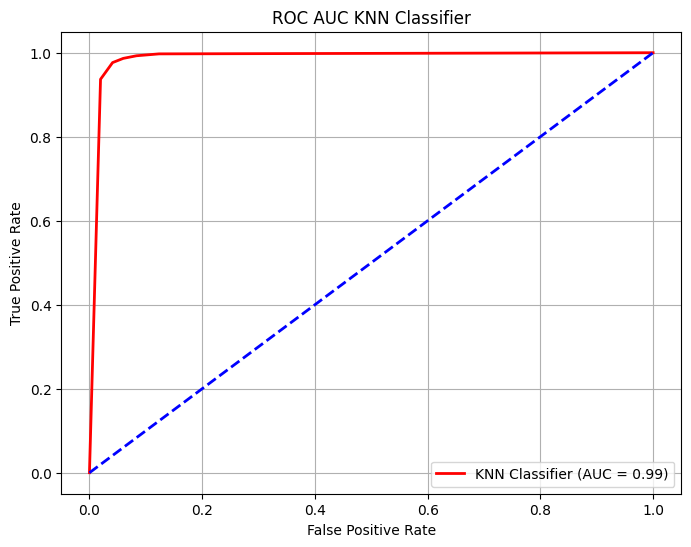

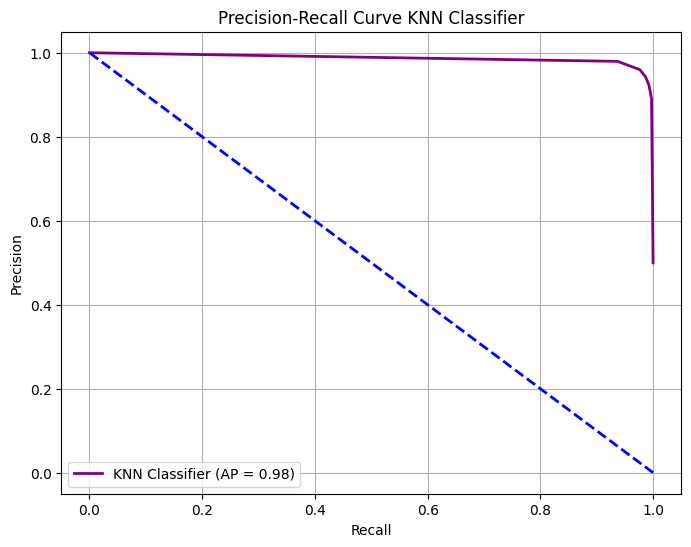

In [27]:
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]
# Ma trận nhầm lẫn (Confusion Matrix Heatmap)
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Biểu đồ ROC (ROC Curve)
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = roc_auc_score(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'KNN Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC KNN Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Biểu đồ Precision-Recall (Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, y_prob_knn)
average_precision = average_precision_score(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'KNN Classifier (AP = {average_precision:.2f})')
plt.plot([1, 0], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve KNN Classifier')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [28]:
# Tính Precision, Recall, F1-score, và Accuracy
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)

# In ra kết quả
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

Precision: 0.943
Recall: 0.987
F1-score: 0.964
Accuracy: 0.963


In [29]:
# Tính toán MAE, MSE và R2-score
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.03674314300500259
Mean Squared Error (MSE): 0.03674314300500259
R-squared (R2): 0.8530273186422667


In [30]:
X_test.columns

Index(['Type', 'air', 'process', 'rotationspeed', 'torque', 'toolware'], dtype='object')

In [31]:
from sklearn.inspection import permutation_importance
# Đánh giá tầm quan trọng của các đặc trưng
result = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42)

# Hiển thị tầm quan trọng
for i in result.importances_mean.argsort()[::-1]:
    print(f"Đặc trưng {i}: Tầm quan trọng = {result.importances_mean[i]}")

Đặc trưng 4: Tầm quan trọng = 0.22692197113449483
Đặc trưng 5: Tầm quan trọng = 0.1457995514921511
Đặc trưng 1: Tầm quan trọng = 0.130406532114312
Đặc trưng 0: Tầm quan trọng = 0.0637456155482721
Đặc trưng 3: Tầm quan trọng = 0.059496291185095744
Đặc trưng 2: Tầm quan trọng = 0.054338450922891156


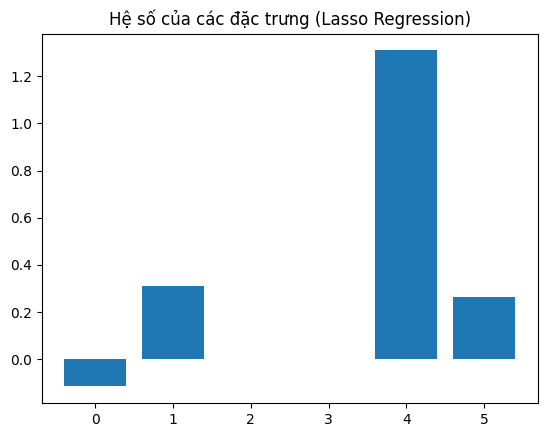

In [32]:
from sklearn.linear_model import Lasso

# Huấn luyện mô hình Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Hiển thị hệ số của các đặc trưng
coef = lasso.coef_
plt.bar(range(X.shape[1]), coef)
plt.title("Hệ số của các đặc trưng (Lasso Regression)")
plt.show()

In [33]:
from sklearn.svm import SVC

#  huấn luyện mô hình SVM
svc = SVC(kernel='linear',probability=True)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

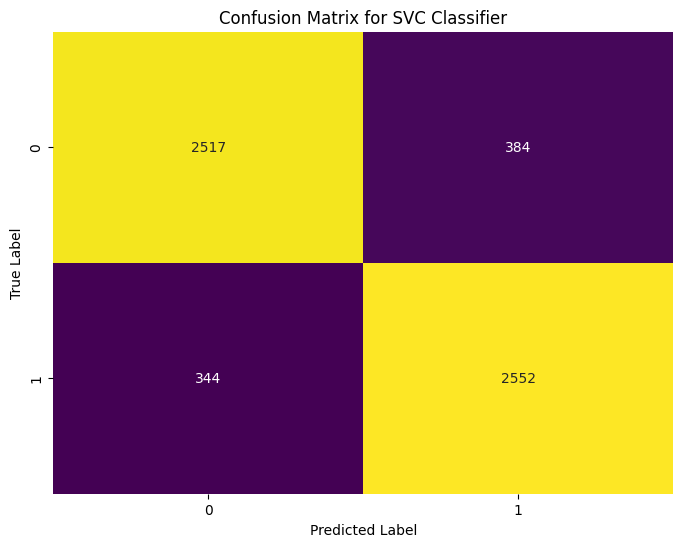

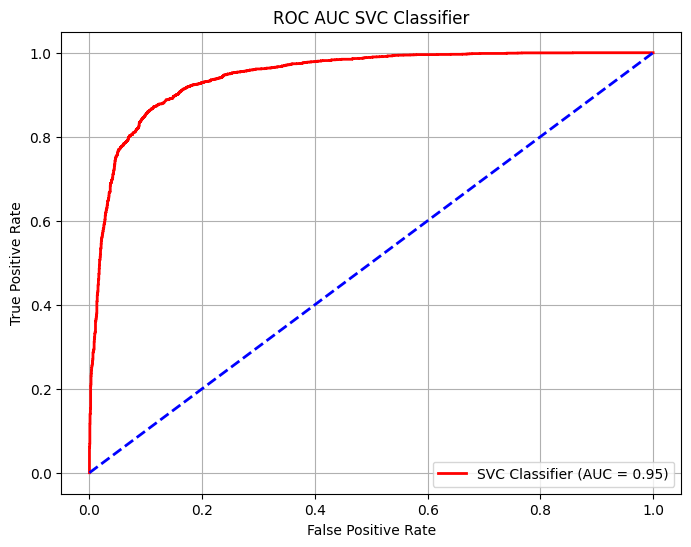

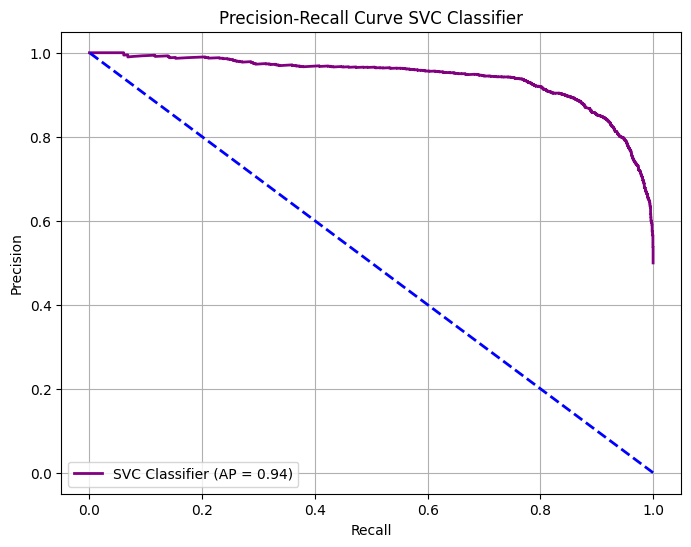

In [34]:
y_pred_svc = svc.predict(X_test)
y_prob_svc = svc.predict_proba(X_test)[:, 1]
# Ma trận nhầm lẫn (Confusion Matrix Heatmap)
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix for SVC Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Biểu đồ ROC (ROC Curve)
fpr, tpr, _ = roc_curve(y_test, y_prob_svc)
roc_auc = roc_auc_score(y_test, y_prob_svc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'SVC Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC SVC Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Biểu đồ Precision-Recall (Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, y_prob_svc)
average_precision = average_precision_score(y_test, y_prob_svc)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'SVC Classifier (AP = {average_precision:.2f})')
plt.plot([1, 0], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve SVC Classifier')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [35]:
# Tính Precision, Recall, F1-score, và Accuracy
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
accuracy = accuracy_score(y_test, y_pred_svc)

# In ra kết quả
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

Precision: 0.869
Recall: 0.881
F1-score: 0.875
Accuracy: 0.874


In [36]:
# Tính toán MAE, MSE và R2-score
mae = mean_absolute_error(y_test, y_pred_svc)
mse = mean_squared_error(y_test, y_pred_svc)
r2 = r2_score(y_test, y_pred_svc)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.12558219768845955
Mean Squared Error (MSE): 0.12558219768845955
R-squared (R2): 0.49767083554727753


In [37]:
from sklearn.inspection import permutation_importance
# Đánh giá tầm quan trọng của các đặc trưng
result = permutation_importance(svc, X_test, y_test, n_repeats=30, random_state=42)

# Hiển thị tầm quan trọng
for i in result.importances_mean.argsort()[::-1]:
    print(f"Đặc trưng {i}: Tầm quan trọng = {result.importances_mean[i]}")

Đặc trưng 4: Tầm quan trọng = 0.34634006095106656
Đặc trưng 1: Tầm quan trọng = 0.1757460755563222
Đặc trưng 2: Tầm quan trọng = 0.07030073026277958
Đặc trưng 5: Tầm quan trọng = 0.04818009315163014
Đặc trưng 0: Tầm quan trọng = 0.01434650106376859
Đặc trưng 3: Tầm quan trọng = 0.010344431027542962
